In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import numpy as np
sys.path.append("../../")
import data_loading as dl

from microfit import run_plotter as rp
from microfit import histogram as hist
from microfit import selections as sel

In [23]:
#RUN = ["1","2","3","4b","4c","4d","5"]
RUN = ["1","3"]
#RUN = ["1"]

rundata, mc_weights, data_pot = dl.load_runs(
    RUN,
    data="bnb",
    truth_filtered_sets=["nue","drt"],
    loadpi0variables=True,
    loadshowervariables=True,
    loadrecoveryvars=True,
    loadsystematics=True,
    load_lee=True,
    blinded=False,
    enable_cache=True,
    numupresel=False,
    loadnumuvariables=False,
    use_bdt=True,
    load_numu_tki=False
)

print(mc_weights)


1
get_rundict: run_number= 1
1
get_rundict: run_number= 1
1
get_rundict: run_number= 1
1
get_rundict: run_number= 1
1
get_rundict: run_number= 1
1
get_rundict: run_number= 1
Loading lee sample
1
get_rundict: run_number= 1
1
get_rundict: run_number= 1
1
get_rundict: run_number= 1
{'data': 1.0, 'ext': 0.5669402866581245, 'mc': 0.13018600227630614, 'nue': 0.003197243095773704, 'drt': 0.528380687211289, 'lee': 0.003197243095773704}


### Try Making the detvar file for the selection and binning ###

In [4]:
import matplotlib.pyplot as plt
from microfit import variable_definitions as vdef

selection = "NPL"
preselection = "NP"
            
binning_def = ("reco_e", 10, (0.15, 1.55), r"Reconstructed Energy [GeV]")    
binning = hist.Binning.from_config(*binning_def[:4])

<class 'str'>
1
get_rundict: run_number= 1
1
get_rundict: run_number= 1
1
get_rundict: run_number= 1
<class 'str'>
3
get_rundict: run_number= 3
3
get_rundict: run_number= 3
3
get_rundict: run_number= 3
<class 'str'>
1
get_rundict: run_number= 1
1
get_rundict: run_number= 1
1
get_rundict: run_number= 1
<class 'str'>
3
get_rundict: run_number= 3
3
get_rundict: run_number= 3
3
get_rundict: run_number= 3
<class 'str'>
1
get_rundict: run_number= 1
1
get_rundict: run_number= 1
1
get_rundict: run_number= 1
<class 'str'>
3
get_rundict: run_number= 3
3
get_rundict: run_number= 3
3
get_rundict: run_number= 3
<class 'str'>
1
get_rundict: run_number= 1
1
get_rundict: run_number= 1
1
get_rundict: run_number= 1
<class 'str'>
3
get_rundict: run_number= 3
3
get_rundict: run_number= 3
3
get_rundict: run_number= 3
<class 'str'>
1
get_rundict: run_number= 1
1
get_rundict: run_number= 1
1
get_rundict: run_number= 1
<class 'str'>
3
get_rundict: run_number= 3
3
get_rundict: run_number= 3
3
get_rundict: run_

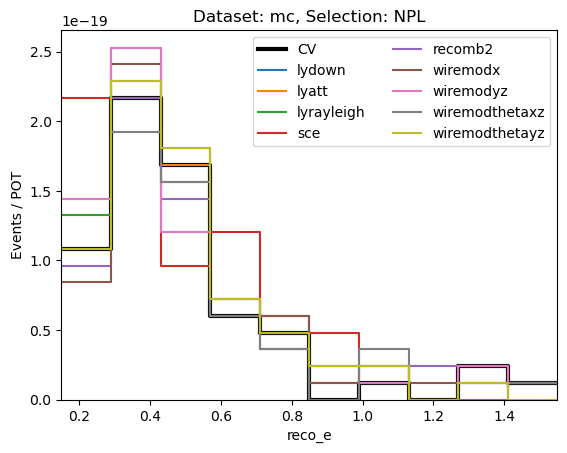

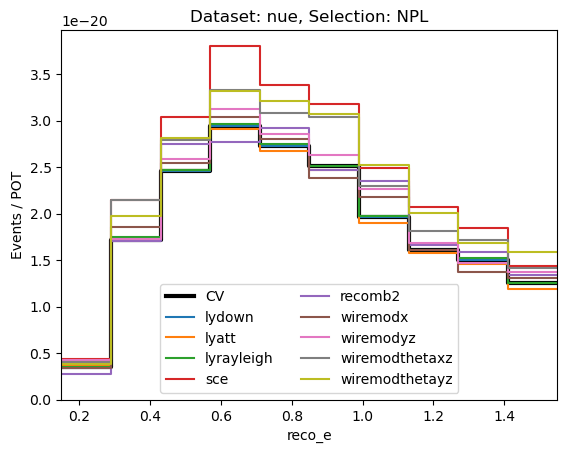

In [43]:
import make_detsys as detsys

RUN = ["1","3"]

detsys.make_variations(
    RUN,
    selection,
    preselection,
    ['nue'],
    False,
    False,
    binning,
    make_plots=True
)

In [ ]:


signal_generator = hist.RunHistGenerator(
    rundata,
    binning,
    data_pot=data_pot,
    selection=selection,
    preselection=preselection,
    sideband_generator=None,
    uncertainty_defaults=None,
    #detvar_data_path="../../detsys_files/detsys_run1_NPL_MEDIUM_PID.json",
)

plotter = rp.RunHistPlotter(signal_generator)
axes = plotter.plot(
    category_column="paper_category",
    include_multisim_errors=True,
    add_ext_error_floor=False,
    show_data_mc_ratio=True,
    show_chi_square=True,
    #add_precomputed_detsys=True
)

#plt.show()     
